<a href="https://colab.research.google.com/github/yashkathe/Deep-Learning-with-PyTorch/blob/master/01_PyTorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01_a_pytorch_workflow.png" alt="pytorch workflow" height="300"  style="display: block; margin: 0 auto">

In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

torch.__version__

'2.2.1+cu121'

## Data preparing and loading

**Data can be almost anything**

- SpreadSheet
- Images
- Videos
- Audio
- DNA
- Text


<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-machine-learning-a-game-of-two-parts.png" alt="pytorch workflow" width="600"  style="display: block; margin: 0 auto">

**ML is game of 2 parts**

1. Get data into numerical representation
2. Build a model to learn patterns in numerical representation

## Creating data from linear regression  

Using linear regression to make a straight line with **known parameters**

_parameter is something that model learns_

<img src="https://toptipbio.com/wp-content/uploads/2021/03/Linear-regression-model-equation.jpg" alt="pytorch workflow" height="200"  style="display: block; margin: 0 auto">

In [2]:
# create know parameters
weight = 0.7
bias = 0.3

# create
start = 0
end = 1
step = 0.02

x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x + bias

print(x[:10])
print(y[:10])

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


In [3]:
len(x), len(y)

(50, 50)

## Splitting data into training and test sets

|Split | 	Purpose 	|Amount of total data |	How often is it used?|
|--|--|--|--|
|Training set| 	The model learns from this data (like the course materials you study during the semester).| 	~60-80% |	Always|
|Validation set |	The model gets tuned on this data (like the practice exam you take before the final exam).| 	~10-20% |	Often but not always|
|Testing set |	The model gets evaluated on this data to test what it has learned (like the final exam you take at the end of the semester).| 	~10-20% 	|Always|

In [4]:
# Create a train/test split of data

train_split = int(0.8 * len(x)) # Training set - 80% of data

x_train, y_train = x[:train_split], y[:train_split] # select first 80% of the data
x_test, y_test = x[train_split:], y[train_split:] # select remaining 20% of the data

print(f"Length of Training dataset -> {len(x_train), len(y_train)}")
print(f"Length of Testing dataset -> {len(x_test), len(y_test)}")

Length of Training dataset -> (40, 40)
Length of Testing dataset -> (10, 10)


## Visualizing Data

In [5]:
# Plots training data, test data and compares predictions
def plot_predictions(train_data=x_train, train_labels=y_train, test_data=x_test, test_labels=y_test, predictions=None, title=""):
  plt.figure(figsize=(6, 4))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="g", s=4, label="Training data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="b", s=4, label="Testing data")

  # Predicitons
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  plt.legend(prop={"size": 8})

  plt.title(title)

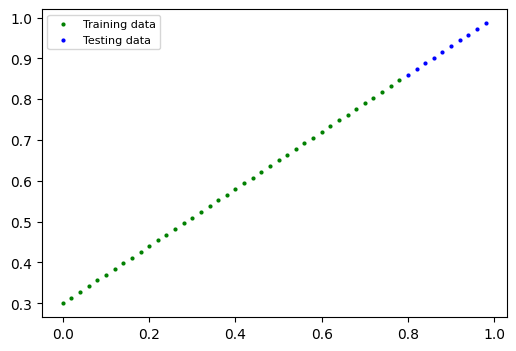

In [6]:
plot_predictions(predictions=None)

## Build PyTorch Model

**What our model does?**  
1. Starts with random values
2. Look at training data and adjust the random values to better represent(or get closer) to the ideal values (the weight and bias values we need to create the data)

**How does it do so ?**    
Through 2 main algorithms
1. Gradient descent
2. Back propogation

In [7]:
class LinearRegressionModel(nn.Module): #inherit from nn.Module
  def __init__(self):
    super().__init__()

    # Initialise model parameters (create variables we need for our model to use)
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward defines computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # x is the input dataset
    return self.weights * x + self.bias # linear regression formula

### Explanation of the code above

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-model-annotated.png" alt="pytorch workflow" height="350"  style="display: block; margin: 0 auto">



### PyTorch model building essentials

| PyTorch module |	What does it do? |
| -------------- | ----------------- |
| torch.nn       |	Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).|
|torch.nn.Parameter |	Stores tensors that can be used with nn.Module. If requires_grad=True gradients (used for updating model parameters via gradient descent) are calculated automatically, this is often referred to as "autograd" |
|torch.nn.Module |	The base class for all neural network modules, all the building blocks for neural networks are subclasses. If you're building a neural network in PyTorch, your models should subclass nn.Module. Requires a forward() method be implemented. |
|torch.optim |	Contains various optimization algorithms (these tell the model parameters stored in nn.Parameter how to best change to improve gradient descent and in turn reduce the loss).|
|def forward() |	All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above).|

## Checking the internals of our model

using `.parameters()`

In [8]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Checking parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters

model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### What is our main goal ?

Look the graph and test data (blue dots) in the graphs

and adjust the _weight_ and _bias_ value (above) to be as close as to the weights and bias (know parameters)

In [10]:
print(f"We have to go from {model_0.state_dict()}")
print(f"To weight: {weight}, bias: {bias}")

We have to go from OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])
To weight: 0.7, bias: 0.3


## Making predictions

using `torch.inference_mode()`

to check our model's predictive power ->
let's start test how well it predicts `y_test` base on `x_test`

when we pass data through our model,
its going to run it through the `forward` method

In [11]:
print(f"for x_test: {x_test}")
print("we have to predict")
print(f"for y_test: {y_test}")

for x_test: tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
we have to predict
for y_test: tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])


In [12]:
with torch.inference_mode():
  y_preds = model_0(x_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

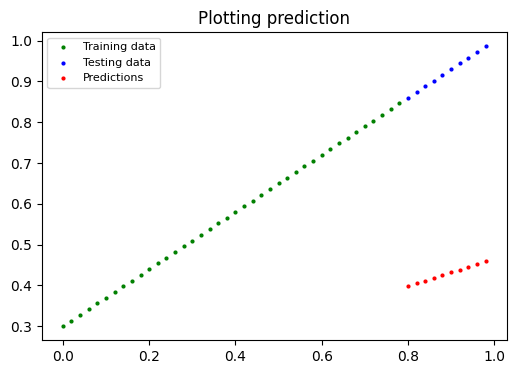

In [13]:
plot_predictions(predictions=y_preds, title="Plotting prediction")

## Training Model

The idea of training is for a model to move from some unknown parameters to known parameters

in other words

From `poor representation` to -> `better representation` of the data


### Things we need to train a model

1. **Loss Function**  
The way to measure how wrong model's prediction is to use a loss function

2. **Optimizer**  
An optimizer is a method used to adjust the model's parameters to minimize the loss function

### And specifically for pytorch we need:

- **Training loop**
- **Testing loop**

In [14]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [15]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

## Mean Absolute Error

Depending on what kind of problem you're working on will depend on what loss function and what optimizer you use.

However, there are some common values, that are known to work well such as the SGD (stochastic gradient descent) or Adam optimizer. And the MAE (mean absolute error) loss function for regression problems (predicting a number) or binary cross entropy loss function for classification problems (predicting one thing or another).

`Mean absolute error` (MAE, in PyTorch: torch.nn.L1Loss) measures the absolute difference between two points (predictions and labels) and then takes the mean across all examples.

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-mae-loss-annotated.png" alt="MAE" height="350"  style="display: block; margin: 0 auto">

And we'll use SGD, `torch.optim.SGD(params, lr) ` where:

  - **`params`** is the target model parameters you'd like to optimize (e.g. the weights and bias values we randomly set before).
  
  - **`lr`** is the learning rate you'd like the optimizer to update the parameters at, higher means the optimizer will try larger updates (these can sometimes be too large and the optimizer will fail to work), lower means the optimizer will try smaller updates (these can sometimes be too small and the optimizer will take too long to find the ideal values). The learning rate is considered a hyperparameter (because it's set by a machine learning engineer). Common starting values for the learning rate are 0.01, 0.001, 0.0001, however, these can also be adjusted over time

In [16]:
# Setup a loss function
loss_fn = nn.L1Loss() # MAE loss is same as L1Loss

# Setup an optimizer (stochastic gradient descent algorithm)
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr  = 0.01) # larger the learning rate, larger is the change in parameters

**Q:** What loss function and optimizer should I use ?

**->** This will be problem specific

For example, for a regression problem(like this), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a dog or a cat, we will need to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in python


A couple of things we need for a training  loop:

1. Loop through the data
2. Forward pass (this involves data moving through our model's `forward()` functions) to make prediction on data - also called `forward propogation`
3. Calculate the loss (compare forward pass predictions to ground truth labels)
4. Optimizer zero grad
5. Loss backward - move backwards through the network to calcualte the gradients of each of the parameters of our models with respect to the loss (**`backpropogation`**)
6. Optimizer step - use the optimizerto adjust our model's paramter to try and improve the loss(**`gradient descent`**)


In [17]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

### Explanation of the training loop

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-training-loop-annotated.png" alt="training our model code explanation" height="450"  style="display: block; margin: 0 auto">

#### Gradient Descent Curve

Behind the scenes pytorch is going to create this curve for every parameter

<img src="https://editor.analyticsvidhya.com/uploads/97106gd4.jpeg" alt="MAE" height="350"  style="display: block; margin: 0 auto">

**Learning Rate Scheduling** says start with some big steps but as we get close to the bottom start taking baby steps

The bottom point is also called **convergence**

<img src="https://editor.analyticsvidhya.com/uploads/59180Screenshot%20(125).png" alt="MAE" height="350"  style="display: block; margin: 0 auto">

### Explanation of the testing loop

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-testing-loop-annotated.png" alt="testing our model code explanation" height="450"  style="display: block; margin: 0 auto">




In [18]:
torch.manual_seed(42)

# An epoch is one loop through the data ...

epochs = 201

epoch_count = []
loss_values = []
test_loss_values = []

# 1. Loop through the data
for epoch in range(epochs):

  # Set the model to training mode (default mode of model)
  model_0.train() # train mode in PyTorch sets all parameters that requires gradients to require gradients

  # 2. Forward pass
  y_pred = model_0(x_train)

  # we learn patterns on training data to evalute on model on test data

  # 3. Calculate the Loss
  loss = loss_fn(y_pred, y_train) # we are calculating the difference between y_pred and y_train data

  # 4. Optimizer zero grad
  optimizer.zero_grad()

  # 5. Perform backpropogation on the loss with respect to the parameters of the model
  loss.backward()

  # 6. Step the optimizer (perform gradient descent)
  # by default how the optimizer changes will accumulate through the lopp so we have to zero them above in step 3 for the next iteration of the loop
  optimizer.step()

  # Testing
  model_0.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode(): # turns off gradient tracking (and other things)

    # 1. Do the forward pass
    test_pred = model_0(x_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
Epoch: 70 | Loss: 0.03476089984178543 | Test loss: 0.0805937647819519
Epoch: 80 | Loss: 0.03132382780313492 | Test loss: 0.07232122868299484
Epoch: 90 | Loss: 0.02788739837706089 | Test loss: 0.06473556160926819
Epoch: 100 | Loss: 0.024458957836031914 | Test loss: 0.05646304413676262
Epoch: 110 | Loss: 0.021020207554101944 | Test loss: 0.04819049686193466
Epoch: 120 | Loss: 0.01758546568453312 | Test loss: 0.04060482233762741
Epoch: 130 | Loss: 0.014155393466353416 | Test loss: 0.03233227878808975
Ep

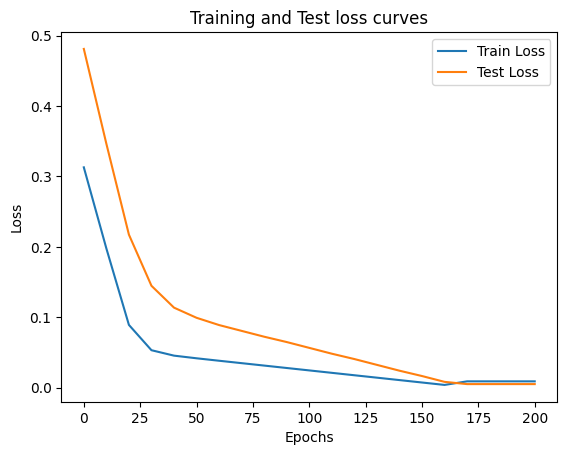

In [19]:
# plot the loss curve

plt.plot(epoch_count, np.array(torch.tensor(loss_values)), label = "Train Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("Training and Test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [20]:
with torch.inference_mode():
  y_preds_new = model_0(x_test)

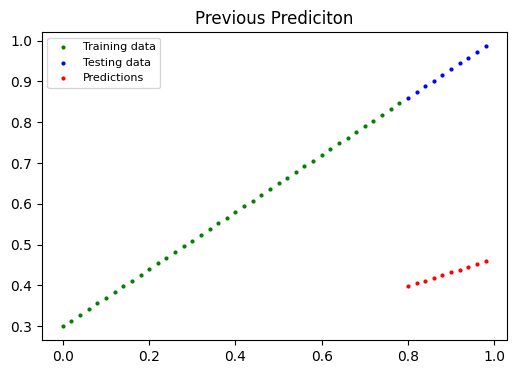

In [21]:
# previous prediciton
plot_predictions(predictions=y_preds, title="Previous Prediciton")

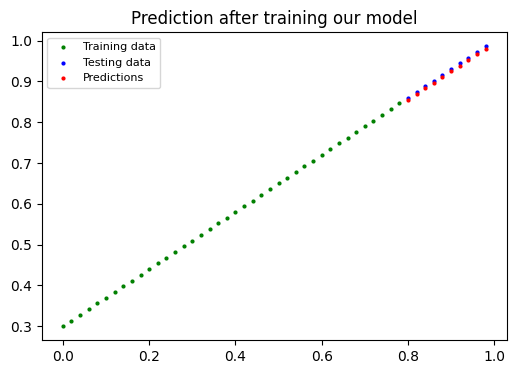

In [22]:
# prediction after training the model
plot_predictions(predictions=y_preds_new, title="Prediction after training our model")

In [23]:
# Desired values
weight, bias

(0.7, 0.3)

In [24]:
# Actual values
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

## Saving a model in pytorch

Three main methods for saving and loading models in PyTorch

1. `torch.save()` - save PyTorch object in python's pickle format
2. `torch.load()` - load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - load model's saved state dictionary


In [25]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [26]:
# saving our pytorch model

from pathlib import Path

# 1. Create model directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

# 3.Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_model.pth


In [27]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1668 Apr  9 02:03 01_pytorch_workflow_model.pth


### Loading our model

We have saved model's `state_dict()` rather than entire model

Hence we will create a new instance of our model class and load the saved `state_dict()` into that

In [28]:
# Load i a saved satte_dict

loaded_model_0 = LinearRegressionModel()

# Load the saved state_dict of model_0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [29]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [30]:
# Make predictions with loaded model

loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(x_test)

In [31]:
# Making predictions with previous mode

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(x_test)

In [32]:
# Compare predictions

y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all together (Revision of all previous steps)

In [33]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

## Create device agnostic code

In [34]:
# setup device agnostic code

device = "cuda" if torch.cuda.is_available() else"cpu"

print(f"Using device: {device}")

Using device: cuda


### Data

create some data using linear regression formula: `y = weight * x + bias`

In [46]:
# setting parameters
weight = 0.7
bias = 0.3

# create range values
start = 0
end = 1
step = 0.02

# create x and y (features and labels)
x = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * x + bias

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

we have values of x which correlate to y

we are going to use training values of x to predict training values of y and subsequently for test values

In [48]:
train_split = int(0.8 * len(x))

x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

print(f"length of training data: {len(x_train), len(y_train)}")
print(f"length of testing data: {len(x_test), len(y_test)}")

length of training data: (40, 40)
length of testing data: (10, 10)


In [55]:
# creating a plot function

def plot_predictions(x_train= x_train, y_train = y_train, x_test = x_test, y_test = y_test, predictions=None, title=""):
  plt.figure(figsize=(8,6))

  plt.scatter(x_train, y_train, c = "g", s = 4, label="training data")

  plt.scatter(x_test, y_test, c = "b", s = 4, label="testing data")

  if predictions is not None:
    plt.scatter(x_test, predictions, c = "r" , s = 4, label="predictions")

  plt.legend(prop={"size": 14})

  plt.title(title)

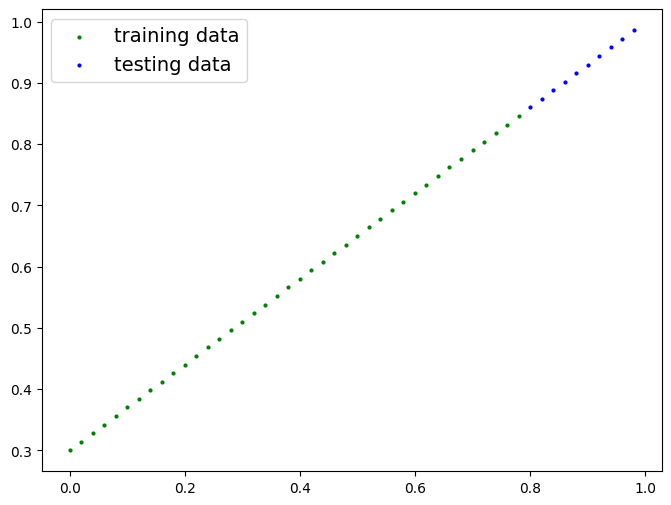

In [56]:
plot_predictions()

### Building a pytorch linear model

<img src="https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/01-pytorch-linear-regression-model-with-nn-Parameter-and-nn-Linear-compared.png" alt="explanation of below code" height="450"  style="display: block; margin: 0 auto">

- Instead of setting parameters, we directly set a layer
- In forward method directly used a function instead of writing formula explicitly

In [67]:
# create a linear model by sublclassing nn.Module

class LinearRegressionModelv2(nn.Module):
  def __init__(self):
    super().__init__()

    # using linear regression formual
    self.linear_layer = nn.Linear(in_features=1, # takes 1 input
                                  out_features=1) # returns 1 output

  # take input data x and pass it to input layer
  def forward(self, x: torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)


# set the manual seed
torch.manual_seed(42)
model_1 = LinearRegressionModelv2()

model_1, model_1.state_dict()

(LinearRegressionModelv2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

### Changing device before training



In [68]:
# check current device
next(model_1.parameters()).device

device(type='cpu')

In [69]:
# set the model to use the target device
model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### Training the model

In [70]:
# setup loss function

loss_fn = nn.L1Loss() # same as MAE

# setup our optimizer

optimizer = torch.optim.SGD(params=model_1.parameters(), # what parameters we have to optimise
                            lr=0.01)

In [73]:
# training loop

torch.manual_seed(42)

epochs = 201

# put data on target device
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  # 1.forward pass
  y_pred = model_1(x_train)

  # 2.calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. perform back propogation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  # Testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(x_test)

    test_loss = loss_fn(test_pred, y_test)

  # print data

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test Loss : {test_loss}")

Epoch: 0 | Loss: 0.5436570048332214 | Test Loss : 0.560505211353302
Epoch: 10 | Loss: 0.42844706773757935 | Test Loss : 0.42579540610313416
Epoch: 20 | Loss: 0.31323719024658203 | Test Loss : 0.2910855710506439
Epoch: 30 | Loss: 0.1980273425579071 | Test Loss : 0.15637575089931488
Epoch: 40 | Loss: 0.0828174576163292 | Test Loss : 0.021665919572114944
Epoch: 50 | Loss: 0.023356428369879723 | Test Loss : 0.04883447289466858
Epoch: 60 | Loss: 0.019609849900007248 | Test Loss : 0.04538799077272415
Epoch: 70 | Loss: 0.01618141122162342 | Test Loss : 0.03711546212434769
Epoch: 80 | Loss: 0.012742983177304268 | Test Loss : 0.028842901811003685
Epoch: 90 | Loss: 0.00930792186409235 | Test Loss : 0.02125724032521248
Epoch: 100 | Loss: 0.005878167692571878 | Test Loss : 0.012984705157577991
Epoch: 110 | Loss: 0.0024393596686422825 | Test Loss : 0.004712170455604792
Epoch: 120 | Loss: 0.010256479494273663 | Test Loss : 0.00033081771107390523
Epoch: 130 | Loss: 0.010256479494273663 | Test Loss : 

In [77]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Making and evaluating predicitons

In [82]:
# turn model into evaluation mode
model_1.eval()

# make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)


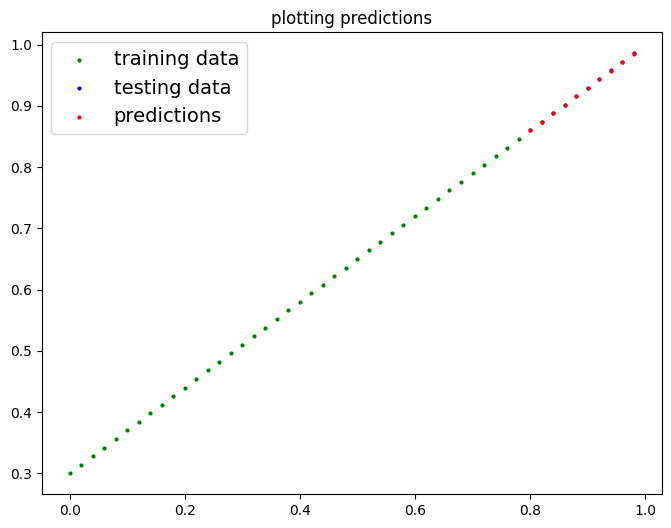

In [83]:
# checkout model predictions
plot_predictions(predictions=y_preds.cpu(), title="plotting predictions")

### Saving and Loading model

In [84]:
from pathlib import Path

# 1. Create directory

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_v2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3 Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH} ")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_v2.pth 


In [86]:
# Loading a model

# create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelv2()

# load the saved model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelv2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [88]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [90]:
# Evaluate loaded model

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(x_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')